In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
 

In [8]:
df = pd.read_csv( '/Users/aryellewright/Documents/Kumar-Biomaterials-Lab/SEC-mals_Zimm-Plot/DIP50_HEMA50_zimm_plot.csv', delimiter=',', encoding='unicode_escape')

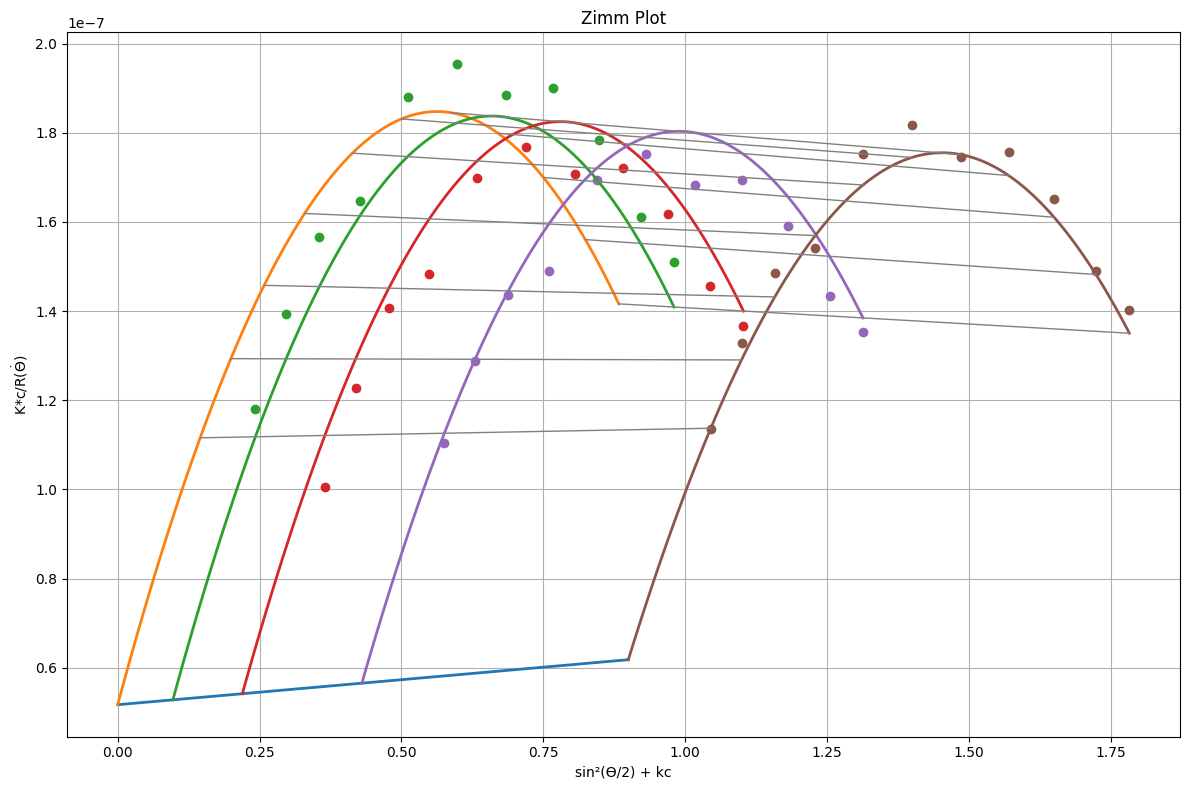

In [9]:
# Given that each pair (sin^2(ϴ/2) + kc, Peak) represents one set of data to plot
columns = df.columns.tolist()
sets_of_data = len(columns) // 2  # Assuming pairs of columns

plt.figure(figsize=(12, 8))

color_dict = {}

# looping through and plotting 
for i in range(sets_of_data):

    x_data = df[columns[2*i]]
    y_data = df[columns[2*i + 1]]
    marker = ''
    line_style = '-'
    label=None
    color = None
    lw=2
    
    if 'Fit Peak' in columns[2*i+1] or 'Zero' in columns[2*i+1]:
        line_style = '-'
        label = columns[2*i + 1]

    elif 'Fit' in columns[2*i+1]:
        lw = 1
        color = "grey"

    else:
        label = columns[2*i + 1]
        marker = 'o'
        line_style = ''

    fit_num = int(columns[2*i + 1].split()[-1]) if columns[2*i + 1].split()[-1].isdigit() else -1

    if fit_num > 0 and fit_num in color_dict:
        plt.plot(x_data, y_data, marker=marker, linestyle=line_style, label=label, color=color_dict[fit_num], lw=lw)
    else:
        new_plot = plt.plot(x_data, y_data, marker=marker, linestyle=line_style, label=label, color=color, lw=lw)
        color_dict[fit_num] = new_plot[0].get_color()


plt.title('Zimm Plot')
plt.xlabel('sin²(ϴ/2) + kc')
plt.ylabel('K*c/R($\dot{\Theta}$)')
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

